In [3]:
import shelve
import io
#import gdbm
#mod = __import__('gdbm')
#import dumbdbm
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import datasets, decomposition
import numpy as np
import gc
from datetime import datetime
import datetime as dt
#datetime.strptime('2016-03-29','%Y-%d-%m')
import dateparser
from ipykernel import kernelapp as app
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from operator import itemgetter
import folium
from folium.plugins import HeatMap
import Instalib_py3 as IL
import Instaplot_py3 as IP
import math
import re
import string
import emoji
import pickle
import scipy.io
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem
import sktensor
import geopy.distance
from itertools import groupby
import ncp_py3
from datetime import timedelta
from dateutil.relativedelta import *
import os
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
import nltk.data #
nltk.download('punkt')
from nltk.stem.snowball import FrenchStemmer
italian_stemmer = nltk.stem.SnowballStemmer('italian')
english_stemmer = nltk.stem.SnowballStemmer('english')
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import langid
langid.set_languages(['it', 'en'])  # ISO 639-1 codes
import importlib


[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2019-03-21 14:24:45,317 : INFO : initializing identifier


# Open the file and have a first look

Read the data and concatenate in a single DataFrame file, basic file format for pandas. It's a 2-D object, tabular file with labeled rows and columns, built from a dictionary or such. 

More info about it here: https://pandas.pydata.org/pandas-docs/stable/10min.html

Make our life easier by matching the Torino labels with the Marseille ones and convert strings to datetime

In [74]:
df_queries=[d for d in os.listdir('DF/') if 'dataframe_query' in d]

df_new=pd.read_pickle('DF/'+df_queries[0])
#df_new=df_new.rename(columns = {'caption':'text','taken_at_timestamp':'date'})
df_new.head()

for df in df_queries[1:]:
    print(pd.read_pickle('DF/'+df).shape, df)

(800, 6) dataframe_query_torino.pkl
(1, 6) dataframe_query_san_donato.pkl
(2, 6) dataframe_query_san donato.pkl
(0, 6) dataframe_query_san_salvario.pkl
(0, 6) dataframe_query_borgo crimea.pkl
(0, 6) dataframe_query_vanchiglia.pkl
(0, 6) dataframe_query_bordo_po.pkl
(3, 6) dataframe_query_mirafiori.pkl
(0, 6) dataframe_query_crocetta.pkl
(0, 6) dataframe_query_san salvario.pkl
(4, 6) dataframe_query_piazza_castello.pkl
(12, 6) dataframe_query_lingotto.pkl
(2, 6) dataframe_query_santa rita.pkl
(0, 6) dataframe_query_borgo_crimea.pkl
(2, 6) dataframe_query_santa_rita.pkl
(0, 6) dataframe_query_cenisia.pkl
(8, 6) dataframe_query_porta nuova.pkl
(0, 6) dataframe_query_bordo po.pkl
(2, 6) dataframe_query_porta_nuova.pkl
(19, 6) dataframe_query_mole.pkl
(0, 6) dataframe_query_nizza.pkl
(0, 6) dataframe_query_vanchiglietta.pkl


In [71]:
df_new.head

(859, 6)

In [2]:
df_users_list=[d for d in os.listdir('DF/USERS') if 'dataframe' in d]

df_new=pd.read_pickle('DF/USERS/'+df_users_list[0])
#df_new=df_new.rename(columns = {'caption':'text','taken_at_timestamp':'date'})
df_new.head()

for df in df_users_list[1:]:
    df_new=pd.concat([df_new,pd.read_pickle('DF/USERS/'+df)])

user_loc_dict=pickle.load(open('user_loc_dict.pkl','rb'))

users=df_new.user_id.tolist()

for i in range(0, len(users)):
    if users[i] not in user_loc_dict.keys():
        users[i]=0
df_new.user_id=users

KeyboardInterrupt: 

In [26]:
#0 in set(df_new['user_id'].tolist())
df_new=df_new[df_new.user_id !=0]

In [16]:
df_users_list=[d for d in os.listdir('DF/USERS') if 'dataframe' in d]

df_new=pd.read_pickle('DF/USERS/'+df_users_list[0])
#df_new=df_new.rename(columns = {'caption':'text','taken_at_timestamp':'date'})
df_new.head()

for df in df_users_list[1:]:
    df_new=pd.concat([df_new,pd.read_pickle('DF/USERS/'+df)])

user_loc_dict=pickle.load(open('user_loc_dict.pkl','rb'))

users=df_new.user_id.tolist()

for i in range(0, len(users)):
    if users[i] not in user_loc_dict.keys():
        users[i]=0
df_new.user_id=users
df_new=df_new[df_new.user_id!=0]

df_new['user_loc']=df_new['user_id'].apply(lambda x : max(user_loc_dict[x],key=itemgetter(1))[0])

def to_coords(user_loc):
    if 'km' in user_loc:
        user_loc=[float(i) for i in user_loc.split(',')[0:2]]
        return user_loc
    else:
        return [float(i) for i in user_loc[1:-1].split(',')]

In [17]:
df_new['user_loc']=df_new['user_loc'].apply(to_coords)

In [7]:
df_new.groupby('lang').count().text.sort_values()

lang
iw          1
bo          1
ur          1
ka          1
uk          2
kn          2
bg          3
sr          3
ko          3
el         10
zh         15
ru         24
fa         57
vi         63
hi         95
is         98
hu        106
sl        131
cs        179
sv        191
lv        203
tr        235
nl        266
fi        270
no        284
cy        293
da        320
lt        472
eu        482
pl        505
et        693
ro        742
de       1141
ca       1223
ht       1275
tl       1447
in       1757
ar       3033
ja       3144
pt       3694
fr       5889
es      14301
und     44484
en      95330
it     342118
Name: text, dtype: int64

In [18]:
df_new.rename(columns={'created_at':'date', 'location':'loc_field','user_loc':'coords'},inplace=True)
df_new.set_index('user_id',inplace=True)

In [19]:
importlib.reload(IL)
list_dates, Histo = IL.N_posts(df_new, debug=False)
Npostslog=[np.log10(H) for H in Histo]
Nposts=[H for H in Histo]

[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


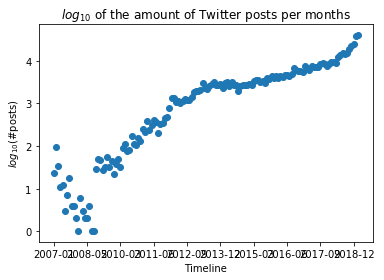

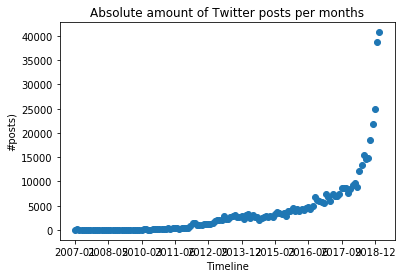

In [20]:
if 'Figures' not in os.listdir('.') and False:
    os.mkdir('Figures')
    os.mkdir('Figures/Shape')
    os.mkdir('Figures/Shape/Spatial')
    os.mkdir('Figures/Shape/Temporal')
plt.figure()
plt.scatter(list_dates, Npostslog)
plt.xticks(list_dates[0::15])
plt.ylabel(r'$log_{10}$(#posts)')
plt.xlabel('Timeline')
plt.title(r'$log_{10}$ of the amount of Twitter posts per months')
#plt.savefig('Figures/Shape/Temporal/Torino_logN.pdf')
plt.show()
plt.figure()
plt.scatter(list_dates, Nposts)
plt.xticks(list_dates[0::15])
plt.ylabel('#posts)')
plt.xlabel('Timeline')
plt.title('Absolute amount of Twitter posts per months')
#plt.savefig('Figures/Shape/Temporal/Torino_N.pdf')
plt.show()

In [21]:
TbyCoords=[e for e in zip(df_new.date,df_new.coords)]

In [22]:
TbyCoords[0][0]

Timestamp('2019-02-21 21:05:49+0000', tz='UTC')

In [391]:
#Heatmap per year
for year in range(2007,2019,1):
    Coordinates=[]
    for t in TbyCoords:
        if str(t[0])[0:4]==str(year):
            Coordinates.append(t[1])
    IL.geo_heatmap(Coordinates ,Nposts, save=False,filename='hm'+str(year),)

KeyboardInterrupt: 

# Let's refine the DataFrame

In [23]:
pickle.dump(df_new, open('df_new_chkpt1.pkl', 'wb'))

Build the frame and the grid. $$x_{min/max}=longitude_{min/max}$$ and conversely for y and latitude.

In [24]:
df_new['lat']=[e[0] for e in df_new['coords']]
df_new['lon']=[e[1] for e in df_new['coords']]

In [25]:

# Attention problème d'arrondi lors du passage de Coord à (lat,lon)
step_m=0.5
lat1,lat2,step_lat,lon1,lon2,step_lon,to_bin_lon,to_bin_lat = IL.build_grid(df_new,step_m)
number_lats,number_lon,df_new=IL.add_grid_todf(df_new,to_bin_lat,to_bin_lon,step_lat,step_lon)
print (number_lats, number_lon)
df_new.coords=df_new.coords.apply(tuple)

25.000000000000913 21.00000000000004


In [27]:
lat1,lon1, lat2,lon2

(45.026999999999994, 7.589198154934451, 45.13504497, 7.71268637)

### Checkpoint 2

In [28]:
#pickle.dump(df_new, open('df_new_chkpt2.pkl', 'wb'))
#df_new=pd.read_pickle('df_new_chkpt2.pkl')

# Time to clean the text

But first make a copy before we do anything stupid

In [116]:
df_new_save=df_new.copy()
#df_new=df_new_save.copy()

This methods works only on unicode text. So we need to use the function x.decode('utf-8') to convert all strings in the 'text' field to unicode objects.

In [117]:
text_0=df_new.text.tolist()[8]
print(text_0)

https://t.co/gmv53t1lF1


In [118]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
#df_new['text_new2'] = df_new['text_new2'].map(lambda x: emoji_pattern.sub(r'', x))
       
#It works on unicode but not on a string:
    
text = u'This dog \U0001f602'
print(text) # with emoji
print(emoji_pattern.sub(r'', text)) # no emoji

text = 'This dog \U0001f602'
print(text) # with emoji
print(emoji_pattern.sub(r'', text)) # no emoji

print('\n but some emojis still pass through... \n')

text=text_0
print(text) # with emoji
print(emoji_pattern.sub(r'', text)) # no emoji

print(text) # with emoji
print(emoji_pattern.sub(r'', text)) # no emoji


This dog 😂
This dog 
This dog 😂
This dog 

 but some emojis still pass through... 

https://t.co/gmv53t1lF1
https://t.co/gmv53t1lF1
https://t.co/gmv53t1lF1
https://t.co/gmv53t1lF1


Another way to deal with emoji would be to de-emojize them. They would then count as words, that can either be removed
since they have the very peculiar following form :grinning_face: 

The difficulty here is identifying emojis in a text. Their classification is hard to decypher

In [400]:
print(text) # with emoji
print(emoji.demojize(text)) # no emoji

Tieni duro 😘😘😘 https://t.co/ReRDzOebyR
Tieni duro :face_blowing_a_kiss::face_blowing_a_kiss::face_blowing_a_kiss: https://t.co/ReRDzOebyR


In [330]:
#df_new=pd.read_pickle('df_new_chkpt2.pkl')

In [29]:
#importlib.reload(IL)
df_new=IL.text_processing(df_new)
df_new.drop(['text'],axis=1,inplace=True)
df_new=df_new.rename(columns = {'text_new':'text'})
df_new=df_new[df_new.text!='']
df_new.text=[e.decode('utf-8') for e in df_new.text.tolist()]
df_new['coordsbin'] = list(zip(df_new.latbin,df_new.lonbin))
#print len(df_new_save.text.tolist()) - len(df_new.text.tolist()), 'posts deleted in the process'
df_new.head()

,rt,date,lang,loc_field,coords,lat,lon,latbin,lonbin,text,coordsbin
user_id,,,,,,,,,,,
1026198161637957632,False,2019-02-21 21:05:49+00:00,und,siciliano e lavoro a Torino*user,"(45.0945, 7.589198154934451)",45.0945,7.589198,45.0945,7.583846,,"(45.0945, 7.583845590959271)"
1026198161637957632,False,2019-02-21 21:05:43+00:00,und,siciliano e lavoro a Torino*user,"(45.0945, 7.589198154934451)",45.0945,7.589198,45.0945,7.583846,,"(45.0945, 7.583845590959271)"
1026198161637957632,False,2019-02-21 20:56:09+00:00,und,siciliano e lavoro a Torino*user,"(45.0945, 7.589198154934451)",45.0945,7.589198,45.0945,7.583846,,"(45.0945, 7.583845590959271)"
1026198161637957632,False,2019-02-21 20:30:36+00:00,it,siciliano e lavoro a Torino*user,"(45.0945, 7.589198154934451)",45.0945,7.589198,45.0945,7.583846,Buonanotte a tutti amici Twitter,"(45.0945, 7.583845590959271)"
1026198161637957632,False,2019-02-21 20:28:51+00:00,und,siciliano e lavoro a Torino*user,"(45.0945, 7.589198154934451)",45.0945,7.589198,45.0945,7.583846,,"(45.0945, 7.583845590959271)"


In [32]:
df_new.shape

(505292, 11)

### Checkpoint 3

In [33]:
#And pickle it
#df_new.to_pickle('df_new_chkpt3.pkl')
#df_new=pd.read_pickle('df_new_chkpt3.pkl')

In [14]:
if True:
    #In case I'm not loading this since the beginning
    dict_coord_name= dict(zip(df_new.coords,df_new.name))
    dict_name_coord= dict(zip(df_new.name,df_new.coords))
    step_m=0.5
    lat1,lat2,step_lat,lon1,lon2,step_lon,to_bin_lon,to_bin_lat = IL.build_grid(df_new,step_m)
    number_lats,number_lon,df_new=IL.add_grid_todf(df_new,to_bin_lat,to_bin_lon,step_lat,step_lon)

Learn about how groupby does not returns a dataframe but only groups the data IN ORDER TO APPLY SOME FUNCTION to it here: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [34]:
df_new_index,df_new_nodup2=IL.indexed_dataframe(df_new,step_lon,step_lat,number_lats)

How many spots? 87


In [36]:
print(len(set(df_new.coords.tolist())), 'different coords in the dataset')
print(len(set(df_new.coordsbin.tolist())), 'different bins in the dataset')

87 different coords in the dataset
56 different bins in the dataset


In [37]:
#Make an index of only the years + months and text of posts
df_new_index=df_new[['date','text','coordsbin']]
df_new_index['date'] = pd.to_datetime(df_new_index['date'], errors='coerce')
df_new_index['year_month'] = list(zip(df_new_index['date'].dt.year, df_new_index['date'].dt.month)) #add a month column
yearmin=min([y[0] for y in df_new_index.year_month.tolist()])
df_new_index['month_abs']=[(e[0]-yearmin)*12+e[1] for e in df_new_index.year_month]

/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be

In [38]:
print(df_new_index.shape)
print(len(df_new_index.text.tolist()), 'posts in df_new_index')
print('among which',len(set(df_new_index.text.tolist())), 'are unique')

(505292, 5)
505292 posts in df_new_index
among which 463787 are unique


### Checkpoint 4

In [39]:
#And pickle it
#df_new_index.to_pickle('df_new_index_chkpt4.pkl')
#df_new_index=pd.read_pickle('df_new_index_chkpt4.pkl')

In [44]:
max(df_new_index.year_month.tolist())

(2019, 2)

In [40]:
list_years=list(set([e[0] for e in df_new_index.year_month.tolist()]))
list_months=list(set([e[1] for e in df_new_index.year_month.tolist()]))
print(sorted(list_years))
print(sorted(list_months))

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [45]:
start=datetime(2007,1,1)
stop=datetime(2019,2,1)
flags=IL.TimeFlags(start,stop,'months',1)
slices=[(f,f+relativedelta(months=1)) for f in flags]

In [46]:
def to_datetime(ts):
    return datetime.utcfromtimestamp(int(ts.timestamp()))

In [47]:
df_new_index.date=df_new_index.date.apply(to_datetime)
df_new.date=df_new.date.apply(to_datetime)

/home/eartiges/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
df_classified=IL.dataframe_classified(slices,df_new_index)
df_classified.head()

2007-01-01 2007-02-01 23


/home/eartiges/Lagrange_Git/Twitter_scraping/Instalib_py3.py:568: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_sliced['text'] = df_sliced.groupby('coordsbin')['text'].transform(lambda x: ','.join(x))


2007-02-01 2007-03-01 90
2007-03-01 2007-04-01 31
2007-04-01 2007-05-01 11
2007-05-01 2007-06-01 12
2007-06-01 2007-07-01 3
2007-07-01 2007-08-01 7
2007-08-01 2007-09-01 18
2007-09-01 2007-10-01 4
2007-10-01 2007-11-01 4
2007-11-01 2007-12-01 2
2007-12-01 2008-01-01 1
2008-01-01 2008-02-01 6
2008-02-01 2008-03-01 3
2008-03-01 2008-04-01 0
ValueError('No objects to concatenate',)
2008-04-01 2008-05-01 2
2008-05-01 2008-06-01 2
2008-06-01 2008-07-01 0
ValueError('No objects to concatenate',)
2008-07-01 2008-08-01 0
ValueError('No objects to concatenate',)
2008-08-01 2008-09-01 4
2008-09-01 2008-10-01 0
ValueError('No objects to concatenate',)
2008-10-01 2008-11-01 0
ValueError('No objects to concatenate',)
2008-11-01 2008-12-01 0
ValueError('No objects to concatenate',)
2008-12-01 2009-01-01 0
ValueError('No objects to concatenate',)
2009-01-01 2009-02-01 1
2009-02-01 2009-03-01 0
ValueError('No objects to concatenate',)
2009-03-01 2009-04-01 1
2009-04-01 2009-05-01 29
2009-05-01 2009-06

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,result
coordsbin,,,,,,,,,,,,,,,,,,,,,
"(45.026999999999994, 7.653948365329483)",,,,,,,,,,,...,I due fratellini esplorando il mondo brothers ...,"zoomtorino piemonte,San Giovanni Sicurezza San...","lanzo pontedeldiavolo torino turin,iliad Rivol...",buongiorno uno qualsiasi dei venditori su Amaz...,salve devo rinnovare la carta didentità di mia...,CNH Industrial VillageBigShow st October day ...,ForzaItalia Novembre Manifestazione sitav a T...,Ultimi istanti di Un Babbo Natale in FORMA con...,"vs Le foto di ieri volley pallavolo…,gennaio ...",sono di nuovo io e ho problemi peggio di prima...
"(45.026999999999994, 7.6603213448176835)",,,,,,,,,,,...,Ultimo round del contest startup FIDA ad ITDAY...,Con il Rinascimento si apre lo straordinario c...,Da rivedere tutte le startup che hanno parteci...,"Mi è piaciuto un video di DIY Doll Houses,Mi ...","WEEK,Jodie talked to on about The Doctors new ...",Gene Roddenberry believed humanity would unite...,Mi è piaciuto un video di Doctor Who Clara an...,Claire Dearing jurassicworld clairedearing cos...,Mi è piaciuto un video di KOREAN VSHAPE FACE ...,"Robert Carlyle Late Late Show via,Lana Parrill..."
"(45.031499999999994, 7.634829426864879)","cio il fine mese,scorreggio,alla fine ho preso...","sono finalmene a casa,faccio un reboot,ed inor...","faccio conto arancio,arrivo in ufficio dopo av...",scarico emulatore di spectrumthe hobbit aspett...,installo client oracledopo annimi piange il cu...,"applicazione patch oracle a jdk AIX,attendo le...","change powertrain PDD,faccio finta di monitora...","per iDGnon è che me ne regali uno,aspetto la t...","fico,vorrei andare a casa,da sede ferrara la r...",impongo le mani sui sistemi di fieramilano per...,...,The Guardian Gallery Mumbais summer camp for b...,The Guardian Gallery Beat it a moonwalk throug...,The life aquaticDuring the summer heat a look ...,The Guardian Gallery Extreme Vespas in Indones...,The Guardian Gallery Eye on the Tiger the worl...,Red Sox win the World SeriesThe Boston Red Sox...,The Guardian Gallery Fred McDarrahs photograph...,The year in pictures Part IIPhotographs from J...,The Guardian Gallery Boston fashion show takes...,"cio il fine mese,scorreggio,alla fine ho preso..."
"(45.031499999999994, 7.673067303794086)",,,,,,,,,,,...,The BMW e M GT car through the Corkscrew racec...,The McLaren MA CanAm car racecarweekend mclare...,This Triumph Bonneville Board Tracker was a st...,The Alfa Romeo C that won Best in Show at Pebb...,Two TransAm legends The Mark Donohue Javelin ...,The Aston Martin DP Grand Touring Competition ...,The gorgeous Alfa Romeo C Competizione italian...,The tii Alpina driven by thatsamsmith at the M...,The Shelby GT americancarthursday montereycarw...,"Starting a new day,iPhone twittering,Bella dri..."
"(45.040499999999994, 7.647575385841281)",,,,,,,,,,,...,"Fammi un regalo Parlami di Te,Ancora un altro ...",scusi mi fa un marocchino se lo faccia a casa ...,"rm Davvero stupendo Appendilo subito,rm Ma poi...",Questo autunno anticipato ha già rotto le pall...,Salvini ha detto che in piazza c’erano solo Ga...,Ho appena guardato lepisodio SE di Arrow tvtim...,Ho appena guardato lepisodio SE di Better Call...,"Ahahahah e non hai nemmeno ancora bevuto,Stase...",LInter ha sprecato tante energie fisiche e men...,"noncapiscocomefunziona,Close to me ..."


### Checkpoint 5

In [50]:
#And pickle it
df_new.to_pickle('df_new_chkpt5.pkl')
df_new_index.to_pickle('df_new_index_chkpt5.pkl')
df_classified.to_pickle('df_classified_chkpt5.pkl')

#df_new=pd.read_pickle('PKL_files/df_new_chkpt5.pkl')
#df_new_index=pd.read_pickle('PKL_files/df_new_index_chkpt5.pkl')
#df_classified=pd.read_pickle('PKL_files/df_classified_chkpt5.pkl')


In [133]:
if 1:
    step_m=.5
    start=datetime(2010,10,1)
    stop=datetime(2018,12,12)
    flags=IL.TimeFlags(start,stop,'months',1)
    slices=[(f,f+relativedelta(months=1)) for f in flags]
    lat1,lat2,step_lat,lon1,lon2,step_lon,to_bin_lon,to_bin_lat = IL.build_grid(df_new,step_m)
    number_lats,number_lon,df_new=IL.add_grid_todf(df_new,to_bin_lat,to_bin_lon,step_lat,step_lon)
    print (number_lats, number_lon)
    #Make an index of only the years + months and text of posts
    gc.collect()
    list_date=list(set([e.date() for e in df_new.date.tolist()]))
    list_years=list(set([e.year for e in list_date]))
    list_months=list(set([e.month for e in list_date]))
    df_new_index=df_new[['date','text','coordsbin']]
    df_new_index['date'] = pd.to_datetime(df_new_index['date'], errors='coerce')
    df_new_index['year_month'] = list(zip(df_new_index['date'].dt.year, df_new_index['date'].dt.month)) #add a month column
    yearmin=min([y[0] for y in df_new_index.year_month.tolist()])
    df_new_index['month_abs']=[(e[0]-yearmin)*12+e[1] for e in df_new_index.year_month]

21.00000000000076 20.0


/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [51]:
# Let's group the data by month and count how many coordsbin we have. 

# Group by month:
count_Ncells_time=df_new_index[['month_abs','coordsbin']].set_index('coordsbin').groupby('month_abs')
# Access the dictionary of groups (groups are the keys, coords are the values):
dict_month_Ncells=count_Ncells_time.groups
# For each month, let's count how many cells are filled.
list_coords_Nposts=[]
for month in dict_month_Ncells.keys():
    coords=dict_month_Ncells[month]
    # We want to keep only one occurence for each cell grid.
    list_coords_Nposts.append((month, len(set(coords))))


In [52]:
def abs_to_yearmonth(month_abs,list_years):
    year_month=str(min(list_years)+(month_abs-month_abs%12)/12)+' '+str(month_abs%12+1)
    return pd.Timestamp(year_month)

In [53]:
importlib.reload(IL)

[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'Instalib_py3' from '/home/eartiges/Lagrange_Git/Twitter_scraping/Instalib_py3.py'>

In [54]:
dates_Ncells=[IL.abs_to_yearmonth(m[0],list_years) for m in list_coords_Nposts]

In [55]:
for gridstep in [.5,1,3,5]:
    plt.figure()
    dates_Ncells_1, list_coords_Nposts_1 = IL.N_cells_info(df_new,gridstep)
    plt.plot(dates_Ncells_1,[e[1] for e in list_coords_Nposts_1])
    plt.xlabel('Month')
    plt.ylabel(r'$N_{cells}$ filled')
    plt.savefig('N_gridcells_step='+str(gridstep)+'.pdf')
    plt.show()
    
    steplon=gridstep/(40000*math.cos((lat1+lat2)*math.pi/360)/360)
    steplat=gridstep/(40000./360.)

for gridstep in [.5,1,3,5]:
    lng=lon1
    lonbins=[lng]
    while lng<lon2+steplon:
        lng+=steplon
        lonbins.append(lng)

    lat=lat1
    latbins=[lat]
    while lat<lat2+steplat:
        lat+=steplat
        latbins.append(lat)
    continue
        # Link the locations associated to a place in particular to visualise what it means.
    m = folium.Map(location=[np.mean(latbins),np.mean(lonbins)], zoom_start=12)
    for lng in lonbins:
        folium.PolyLine(locations=((min(latbins),lng),(max(latbins),lng)),weight=1).add_to(m)
    for lat in latbins:
        folium.PolyLine(locations=((lat,min(lonbins)),(lat,max(lonbins))),weight=1).add_to(m)
    #m.save('grid_'+str(gridstep)+'.html') 

/home/eartiges/Lagrange_Git/Twitter_scraping/Instalib_py3.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_index['date'] = pd.to_datetime(df_index['date'], errors='coerce')
/home/eartiges/Lagrange_Git/Twitter_scraping/Instalib_py3.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_index['year_month'] = list(zip(df_index['date'].dt.year, df_index['date'].dt.month))
/home/eartiges/Lagrange_Git/Twitter_scraping/Instalib_py3.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

TypeError: 'int' object is not iterable

<Figure size 432x288 with 0 Axes>

In [136]:
m = folium.Map(location=[lat1,lon1], zoom_start=12)
for i in range(start,stop):
    for p in df_classified.index[df_classified[i] != ''].tolist():
        folium.Marker(p).add_to(m)
m

# Checkpoint 5 (2)

In [137]:
#And pickle it
#df_new.to_pickle('df_new_chkpt5.pkl')
#df_new_index.to_pickle('df_new_index_chkpt5.pkl')
#df_classified.to_pickle('df_classified_chkpt5.pkl')

#df_new=pd.read_pickle('df_new_chkpt5.pkl')
#df_new_index=pd.read_pickle('df_new_index_chkpt5.pkl')
#df_classified=pd.read_pickle('df_classified_chkpt5.pkl')

# Term vector building by NTF

Stemming = removing all suffixes in the word to keep only its root.

This part executes NMF on time slices of the data, to have an idea of what the output might be. It generates .mat files that can be used by matlab.

More about NMF here: https://scikit-learn.org/stable/modules/decomposition.html#nmf

More info about countvectorizer here: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

And about TfIdf: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

And about NMF:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [ ]:
#pickle.dump(df_classified, open('df_granularity.pkl','wb'))

In [7]:
#counts = vectorizer_s.fit_transform(list_reviews_all)
#pickle.dump(counts, open('counts_master.pkl','wb'))
#pickle.dump(counts, open('counts_master_noMon.pkl','wb'))
#pickle.dump(vectorizer_s, open('vec_s_master.pkl','wb'))
#counts = pickle.load( open( 'PKL_files/counts_master.pkl', "rb" ) )
#vectorizer_s = pickle.load( open( 'PKL_files/vec_s_master.pkl', "rb" ) )

/home/eartiges/.local/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lamiacitt', 'torino\xc3'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [2]:
df_new=pd.read_pickle('df_new_chkpt5.pkl')
df_new_index=pd.read_pickle('df_new_index_chkpt5.pkl')
df_classified=pd.read_pickle('df_classified_chkpt5.pkl')

In [45]:
if 1:
    step_m=.5
    start=datetime(2010,10,1)
    stop=datetime(2018,12,12)
    flags=IL.TimeFlags(start,stop,'months',1)
    slices=[(f,f+relativedelta(months=1)) for f in flags]
    lat1,lat2,step_lat,lon1,lon2,step_lon,to_bin_lon,to_bin_lat = IL.build_grid(df_new,step_m)
    number_lats,number_lon,df_new=IL.add_grid_todf(df_new,to_bin_lat,to_bin_lon,step_lat,step_lon)
    print (number_lats, number_lon)
    #Make an index of only the years + months and text of posts
    gc.collect()
    list_date=list(set([e.date() for e in df_new.date.tolist()]))
    list_years=list(set([e.year for e in list_date]))
    list_months=list(set([e.month for e in list_date]))
    df_new_index=df_new[['date','text','coordsbin']]
    df_new_index['date'] = pd.to_datetime(df_new_index['date'], errors='coerce')
    df_new_index['year_month'] = list(zip(df_new_index['date'].dt.year, df_new_index['date'].dt.month)) #add a month column
    yearmin=min([y[0] for y in df_new_index.year_month.tolist()])
    df_new_index['month_abs']=[(e[0]-yearmin)*12+e[1] for e in df_new_index.year_month]

28.000000000001027 25.000000000000025


/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [56]:
lang = detect("Ein, zwei, drei, vier")
# it for italian, en for english
class StemmedCountVectorizer(CountVectorizer):
    # This class is basically a CountVectorizer class that has been enhanced with a stemmer method.
    def build_analyzer(self):
        #Use super to access the method build_analyzer form the class CountVectorizer.
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        #return lambda doc: ([italian_stemmer.stem(w) for w in analyzer(doc)])
        return lambda doc: ([self.stemmer(w) for w in analyzer(doc)])
    
    def stemmer(self, w):
        if langid.classify(w)=='it':
            return italian.stemmer(w)
        elif langid.classify(w)=='en':
            return english.stemmer(w)
        else:
            return w
        
    def language_detector(w):
        try:
            return langid.classify(w)[0]
        except LangDetectException:
            return 'emoji'
    

In [57]:
# Write the montly tweets in files
for col in df_classified.columns[:-1]:
    break
    f=open('posts_per_month/{}.txt'.format(col), 'w')
    for t in df_classified[col].tolist():
        f.write(t+'\n')
    f.close()

In [58]:
import gensim
model_1= gensim.models.Word2Vec(IL.sentences,iter=1,workers=32,window=5)
#model_1.wv.most_similar('negro')

2019-02-25 10:47:10,397 : INFO : collecting all words and their counts
2019-02-25 10:47:10,400 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-25 10:47:12,072 : INFO : collected 689932 word types from a corpus of 4795401 raw words and 8170 sentences
2019-02-25 10:47:12,073 : INFO : Loading a fresh vocabulary
2019-02-25 10:47:12,412 : INFO : effective_min_count=5 retains 61159 unique words (8% of original 689932, drops 628773)
2019-02-25 10:47:12,413 : INFO : effective_min_count=5 leaves 4021920 word corpus (83% of original 4795401, drops 773481)
2019-02-25 10:47:12,715 : INFO : deleting the raw counts dictionary of 689932 items
2019-02-25 10:47:12,733 : INFO : sample=0.001 downsamples 33 most-common words
2019-02-25 10:47:12,733 : INFO : downsampling leaves estimated 3448357 word corpus (85.7% of prior 4021920)
2019-02-25 10:47:12,928 : INFO : estimated required memory for 61159 words and 100 dimensions: 79506700 bytes
2019-02-25 10:47:12,929 : INFO :

In [59]:
model_1.most_similar('pittura')

/opt/anaconda/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-02-25 10:47:28,422 : INFO : precomputing L2-norms of word weight vectors


[('Rotonda', 0.8846662044525146),
 ('DOWNTOWN', 0.878991961479187),
 ('Alsazia', 0.8787842988967896),
 ('Retiro', 0.8747286796569824),
 ('Vogue,Dj', 0.8684545159339905),
 ('Virgen', 0.8680027723312378),
 ('JOY', 0.8649398684501648),
 ('Plage', 0.86476069688797),
 ('Gen', 0.8640666007995605),
 ('Puerta', 0.8579146862030029)]

In [61]:
importlib.reload(IL)
start=30
stop=92
#MATLAB says up to 15 terms we still have a core consistency above 60% without sampling. 
#at 16, the CC already varies a lot (between 3 ad 50%)
#For sampled, up to 17 terms seems to be OK.
n_topics=15
n_features=5000

sampling=False
mat_export=True
seeded=False
expanded=False

seed='pittura'

#Filter out the monuments?
monuments=False

df_classified=pd.read_pickle('df_classified_chkpt5.pkl')

all_stopwords=IL.stopwords(monuments)

if seeded and not expanded:
    df_word2vec=IL.df_seeding(df_classified, seed)
    list_reviews_all=df_word2vec.result.tolist()
elif expanded:
    df_word2vec=IL.df_expanded_seeding(df_classified, seed,model=model_1)
    list_reviews_all=df_word2vec.result.tolist()
else:
    list_reviews_all=df_classified.result.tolist()

#Build the vectorizer and the list of all words in the dataset
vectorizer_s = StemmedCountVectorizer(max_df=0.95, max_features=n_features, analyzer="word", stop_words=all_stopwords)     
while '' in list_reviews_all:
    list_reviews_all.remove('')
while "" in list_reviews_all:
    list_reviews_all.remove("")

[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
importlib.reload(IL)
path=IL.file_tree2(seeded,expanded,n_features,sampling,flags,start,n_topics,monuments,len(list_reviews_all),seed=seed)
for sample_run in range(1):
    if sampling:
        print('SPL')
        df_toNTF=IL.dataframe_sampled(df_classified,start)
        counts = vectorizer_s.fit_transform([''.join(list(set(df_toNTF[col].tolist()))) for col in df_toNTF.columns])
        #counts = pickle.load( open( 'PKL_files/counts_stemmed_sampled.pkl', "rb" ) )
        vectorizer_new = StemmedCountVectorizer(max_df=0.95, max_features=n_features, analyzer="word", stop_words=all_stopwords,vocabulary=vectorizer_s.vocabulary_) 
        voc_vector={k:v for v,k in enumerate(vectorizer_s.vocabulary_)}
        voc_serie=pd.Series(voc_vector)
        feature_names = vectorizer_s.get_feature_names()
    else:
        if seeded or expanded:
            print('seed or W2V')
            df_toNTF=df_word2vec
        else:    
            print('standard NTF')
            df_toNTF=df_classified
            #counts = pickle.load( open( 'PKL_files/counts_stemmed.pkl', "rb" ) )
        print('counts')
        counts = vectorizer_s.fit_transform(list_reviews_all)
        print('counts done')
        vectorizer_new = StemmedCountVectorizer(max_df=0.95, max_features=n_features, analyzer="word", stop_words=IL.all_stopwords,vocabulary=vectorizer_s.vocabulary_) 
        voc_vector={k:v for v,k in enumerate(vectorizer_s.vocabulary_)}
        voc_serie=pd.Series(voc_vector)
        feature_names = vectorizer_s.get_feature_names()
    A,B,C,TermVectorsIndex,TermVectors,lambdas = IL.NTF_sampling(sampling,df_toNTF,flags,start,stop,path, vectorizer_new=vectorizer_new,vectorizer_s=vectorizer_s,n_topics=n_topics,n_features=n_features,matlab=mat_export,monuments=monuments)       
    for tvi in TermVectorsIndex:
        print(TermVectorsIndex.index(tvi), lambdas[TermVectorsIndex.index(tvi)], [t[0] for t in tvi[0:8]])

[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/eartiges/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lamiacitt', 'torinoã'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1
standard NTF
counts
counts done
2009-07-01 00:00:00
56
2009-08-01 00:00:00
56
2009-09-01 00:00:00
56
2009-10-01 00:00:00
56
2009-11-01 00:00:00
56
2009-12-01 00:00:00
56
2010-01-01 00:00:00
56
2010-02-01 00:00:00
56
2010-03-01 00:00:00
56
2010-04-01 00:00:00
56
2010-05-01 00:00:00
56
2010-06-01 00:00:00
56
2010-07-01 00:00:00
56
2010-08-01 00:00:00
56
2010-09-01 00:00:00
56
2010-10-01 00:00:00
56
2010-11-01 00:00:00
56
2010-12-01 00:00:00
56
2011-01-01 00:00:00
56
2011-02-01 00:00:00
56
2011-03-01 00:00:00
56
2011-04-01 00:00:00
56
2011-05-01 00:00:00
56
2011-06-01 00:00:00
56
2011-07-01 00:00:00
56
2011-08-01 00:00:00
56
2011-09-01 00:00:00
56
2011-10-01 00:00:00
56
2011-11-01 00:00:00
56
2011-12-01 00:00:00
56
2012-01-01 00:00:00
56
2012-02-01 00:00:00
56
2012-03-01 00:00:00
56
2012-04-01 00:00:00
56
2012-05-01 00:00:00
56
2012-06-01 00:00:00
56
2012-07-01 00:00:00
56
2012-08-01 00:00:00
56
2012-09-01 00:00:00
56
2012-10-01 00:00:00
56
2012-11-01 00:00:00
56
2012-12-01 00:00:00
56


[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


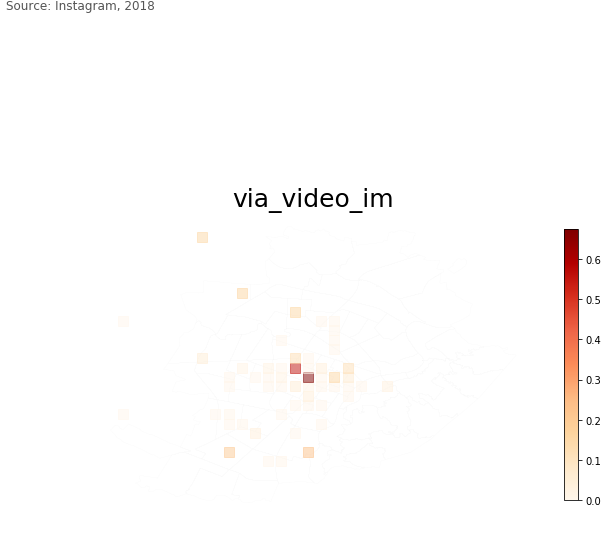

file saved Results/2019-02-25_15_5000/Heatmaps/via_video_im


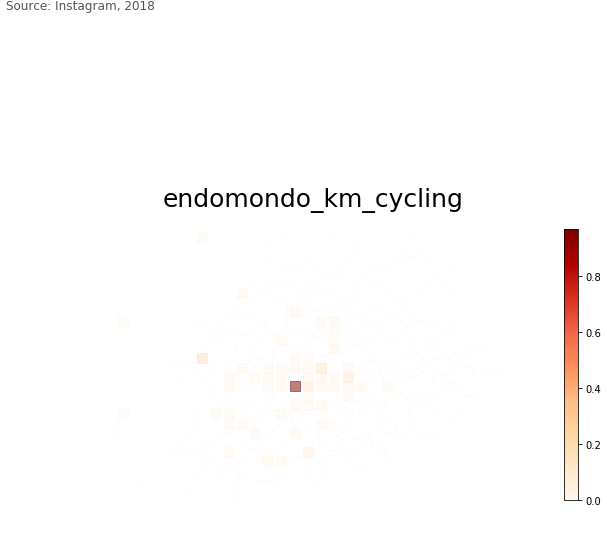

file saved Results/2019-02-25_15_5000/Heatmaps/endomondo_km_cycling


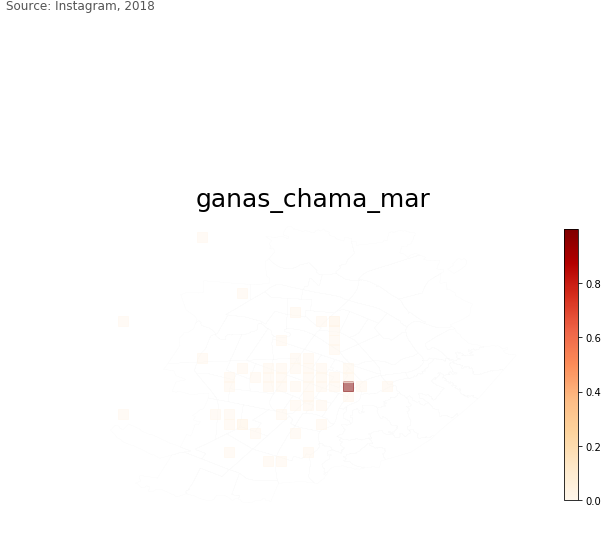

file saved Results/2019-02-25_15_5000/Heatmaps/ganas_chama_mar


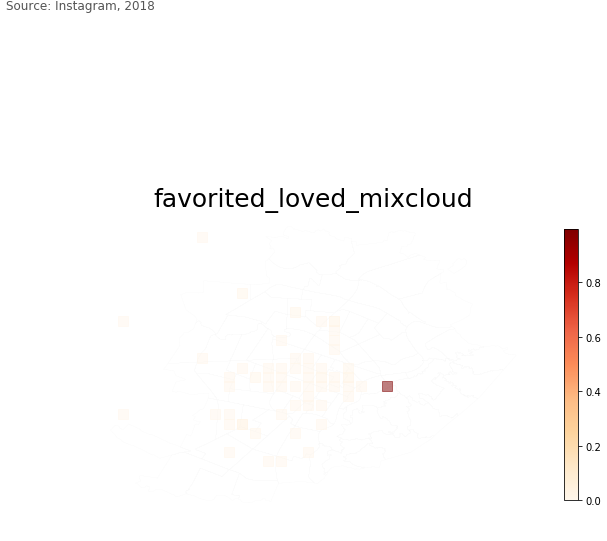

file saved Results/2019-02-25_15_5000/Heatmaps/favorited_loved_mixcloud


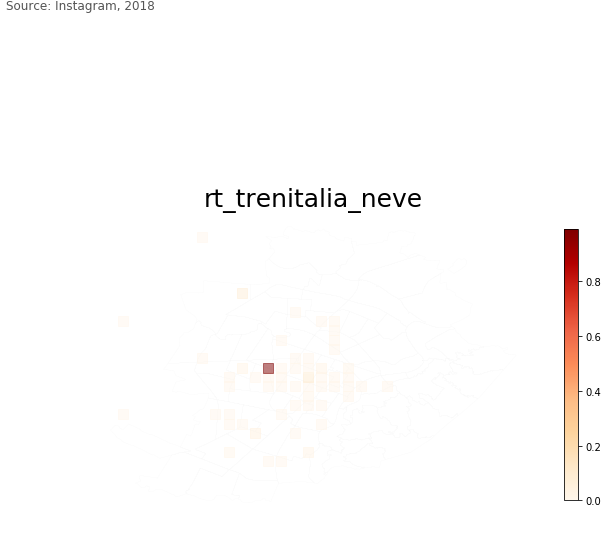

file saved Results/2019-02-25_15_5000/Heatmaps/rt_trenitalia_neve


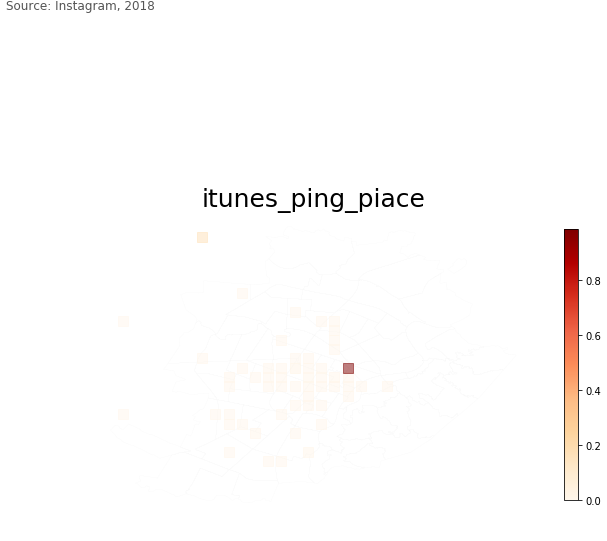

file saved Results/2019-02-25_15_5000/Heatmaps/itunes_ping_piace


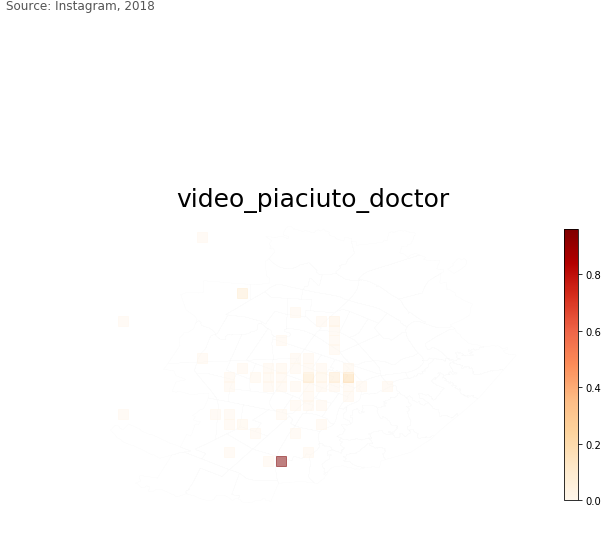

file saved Results/2019-02-25_15_5000/Heatmaps/video_piaciuto_doctor


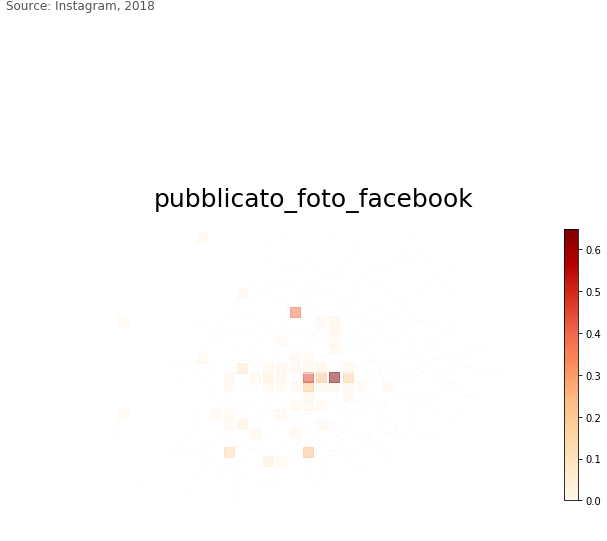

file saved Results/2019-02-25_15_5000/Heatmaps/pubblicato_foto_facebook


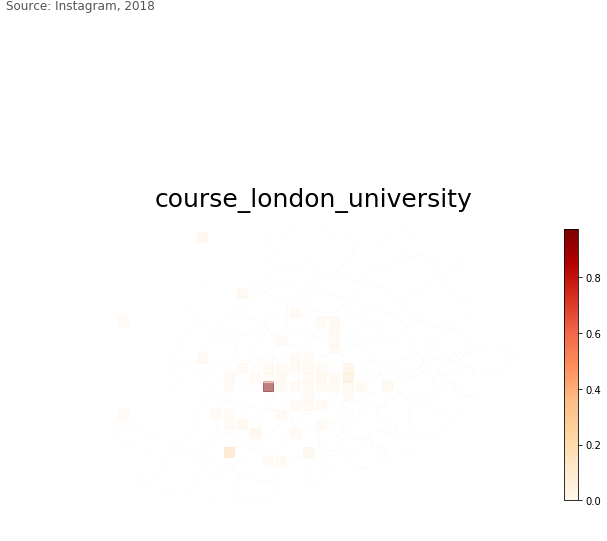

file saved Results/2019-02-25_15_5000/Heatmaps/course_london_university


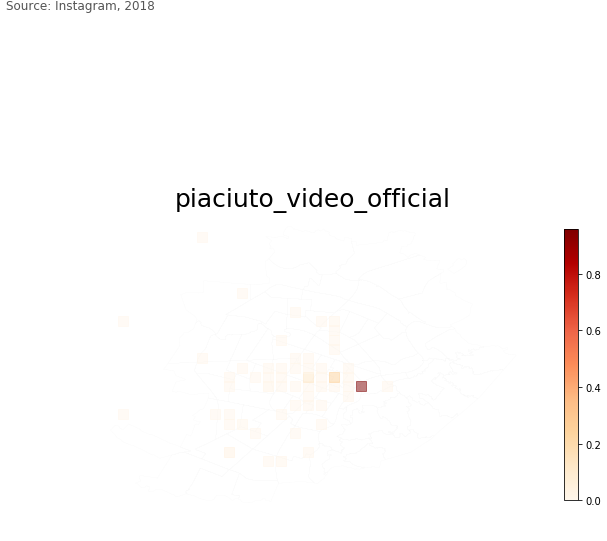

file saved Results/2019-02-25_15_5000/Heatmaps/piaciuto_video_official


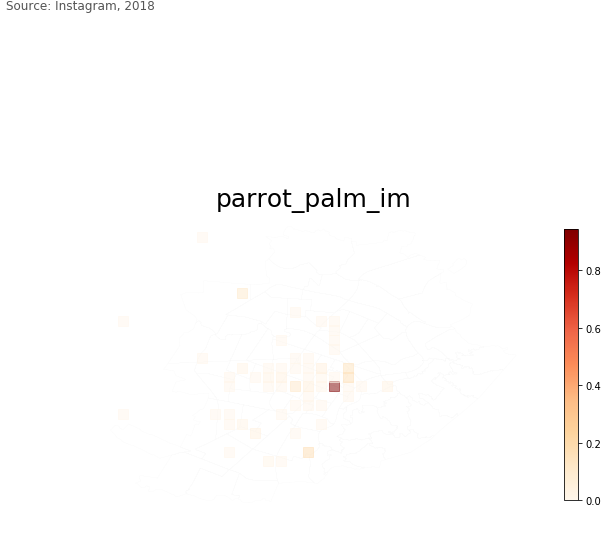

file saved Results/2019-02-25_15_5000/Heatmaps/parrot_palm_im


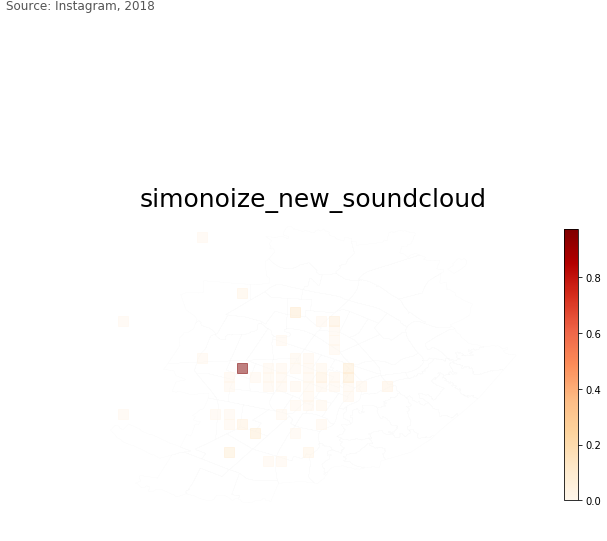

file saved Results/2019-02-25_15_5000/Heatmaps/simonoize_new_soundcloud


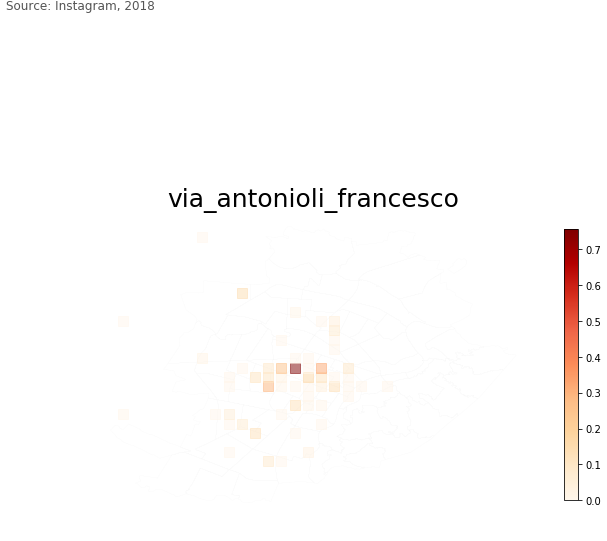

file saved Results/2019-02-25_15_5000/Heatmaps/via_antonioli_francesco


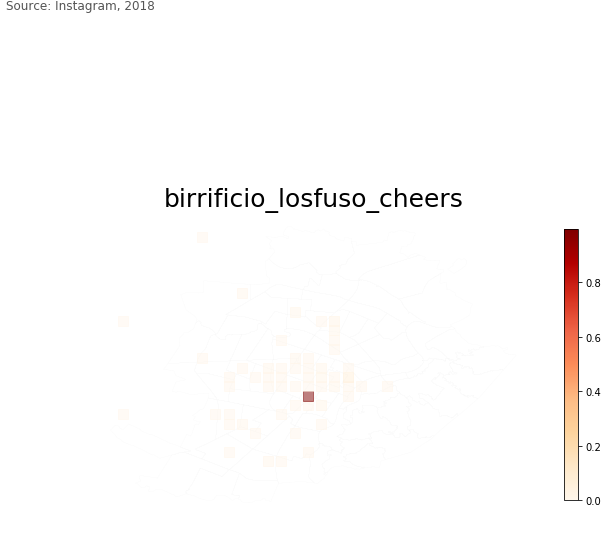

file saved Results/2019-02-25_15_5000/Heatmaps/birrificio_losfuso_cheers


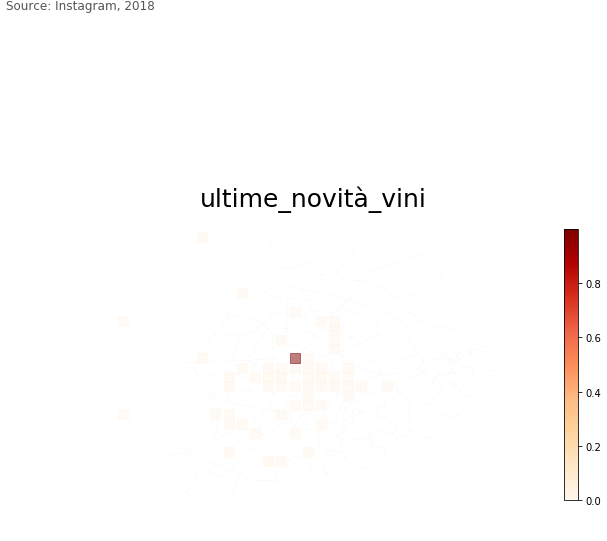

file saved Results/2019-02-25_15_5000/Heatmaps/ultime_novità_vini


/home/eartiges/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


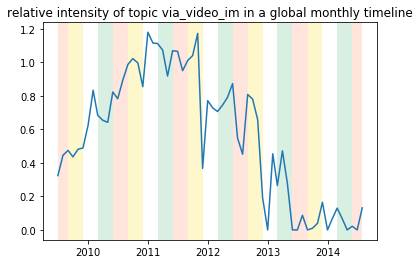

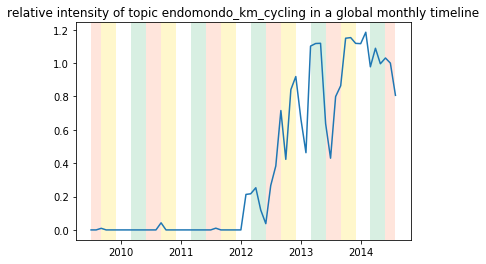

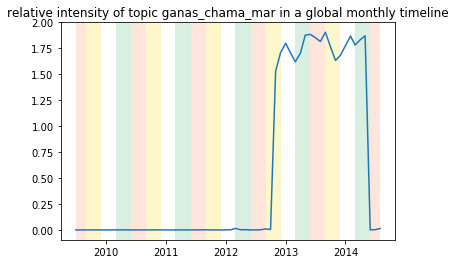

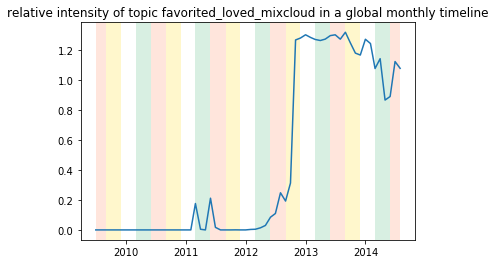

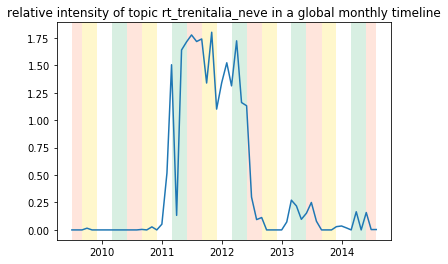

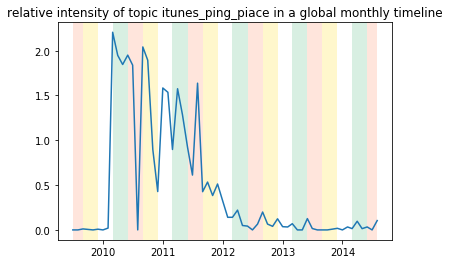

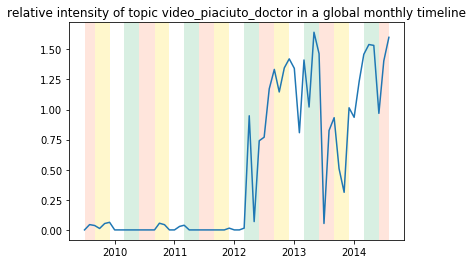

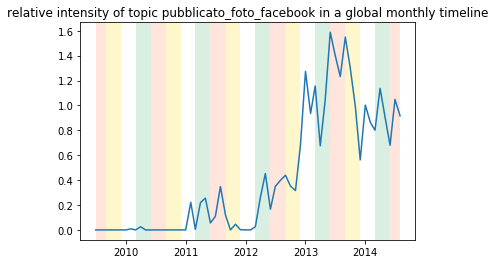

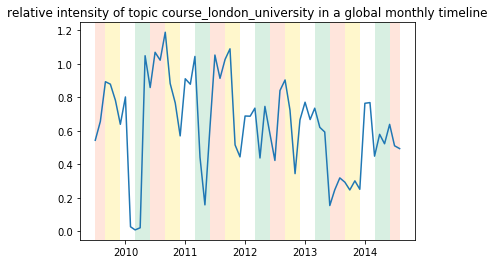

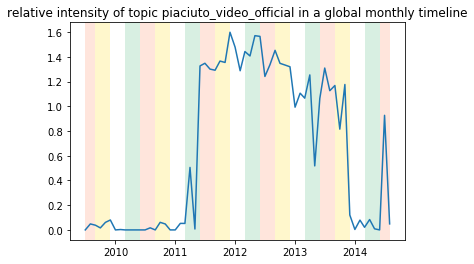

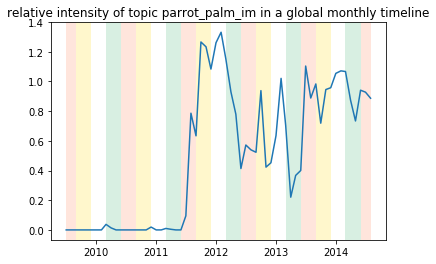

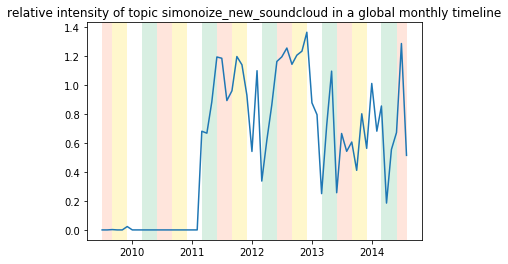

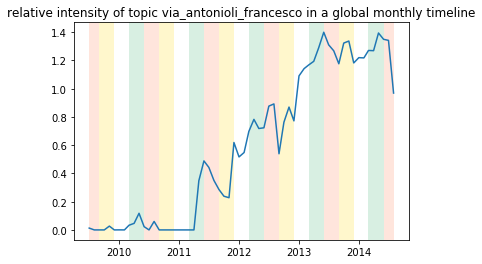

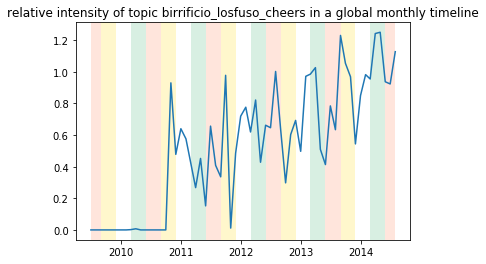

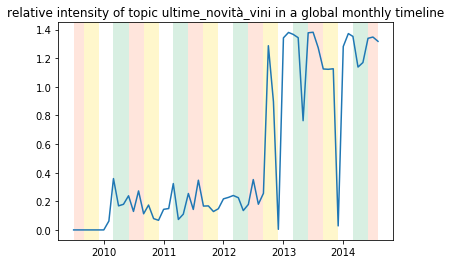

In [63]:
importlib.reload(IL)
importlib.reload(IP)
#msg='Set of Heatmaps made on the 24/01, sampled from April 2013. First run to be made with 17 TV. with Monuments'
#foldername1='Heatmaps_2401_17_spl'
#foldername2='NTF_2401_17_spl'

#Geographical repartition of topics
for i in range(0,len(A.T)):
    Coordinates=list(df_classified.index)
    row=A.T[i]
    topic=''
    for j in (0,1,2):
        topic+='_'+TermVectorsIndex[i][j][0]
    #IL.geo_topic(row,Coordinates,i,topic=topic,save=True,folder=path+'Heatmaps/')
    #IP.geo_hm_one(A.T[i],df_toNTF.index,'OrRd',string.join([t[0] for t in TermVectorsIndex[i][0:3]]),save=True,folder=path+'Heatmaps/',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
    IP.geo_plot_one(A.T[i],df_toNTF.index,'OrRd','_'.join([t[0] for t in TermVectorsIndex[i][0:3]]),save=True,folder=path+'Heatmaps/',shapefile='zone_statistiche_geo.shp')

# Time Series    
seasons=['white', 'mediumseagreen', 'coral', 'gold']
for index in range(0, len(C.T)):
    row=C.T[index]
    topic=''
    for i in (0,1,2):
        topic+=TermVectorsIndex[index][i][0]+'_'
    topic=topic.strip('_')
    plt.figure()
    plt.plot(flags[start:][0:len(row)], row)
    plt.xticks(flags[start:stop][[f.date().month for f in flags[start:stop]].index(1)::12])
    for i in range(0, len(flags[start:stop])-1):
        season=seasons[int(((int(str(flags[start+i].date()).split('-')[1])-3)/3+1)%4)]
        plt.axvspan(flags[start+i],flags[start+i+1], facecolor=season, alpha=0.2)
    plt.title('relative intensity of topic '+topic+' in a global monthly timeline')
    if True:
        plt.savefig(path+'t_series/plot_topic_'+topic+'.pdf')
    plt.show()
    
f=open(path+'TermVectors.txt','w')
for tvi in TermVectorsIndex[::-1]:
    f.write(str(TermVectorsIndex.index(tvi))+ ' '+str([t[0] for t in tvi[0:10]])+'\n')
f.close()

pickle.dump(A, open(path+'pickle/A.pkl','wb'))
pickle.dump(B, open(path+'pickle/B.pkl','wb'))
pickle.dump(C, open(path+'pickle/C.pkl','wb'))
pickle.dump(Coordinates, open(path+'pickle/Grid.pkl','wb'))
f = open(path+'pickle/Vocabulary.csv', 'w')
for item in feature_names:
    f.write("%s\n" % item.encode('utf-8'))
f.close()

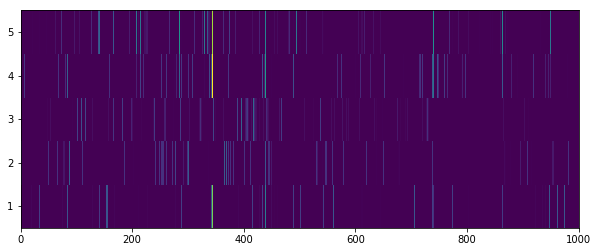

In [109]:
#Topics definition
plt.figure(figsize=(10,4))
plt.pcolormesh(B.T)#, cmap=plt.cm.Greys)
plt.xlim(0,B.shape[0])
plt.yticks(np.arange(B.shape[1])+0.5, np.arange(1,B.shape[1]+1))
#plt.savefig('Topic_definition_normalized.pdf')
plt.show()

#for tvi in TermVectorsIndex:
    #print TermVectorsIndex.index(tvi), [t for t in tvi[0:3]]
#    print TermVectorsIndex.index(tvi), [t[0] for t in tvi[0:5]]

In [ ]:
CommonWords=set([])
for t in TermVectors:
    for t_other in TermVectors:
        if t_other!=t:
            for term in t.union(t_other):
                CommonWords.add(term)

In [ ]:
for t in TermVectors:
    T=list(t)
    print len(t)
    for word in t:
        if word in CommonWords:
            T.remove(word)
    t=set(T)
    print len(T)

In [182]:
for tvi in TermVectorsIndex:
    #print TermVectorsIndex.index(tvi), [t for t in tvi[0:3]]
    print TermVectorsIndex.index(tvi), [t[0].encode('utf-8') for t in tvi[0:10]]

0 ['dar', 'climbing', 'fly', 'winter', 'dark', 'murales', 'solocosebell', 'libr', 'lif', 'song']
1 ['aspett', 'palazz', 'mylif', 'palestr', 'augur', 'facil', 'domen', 'river', 'student', 'training']
2 ['pics', 'archidaily', 'arred', 'shoes', 'class', 'torinocity', 'sunday', 'mylif', 'bas', 'lamor']
3 ['hair', 'collin', 'hairstyl', 'far', 'likebackteam', 'green', 'streetart', 'beauty', 'gir', 'blu']
4 ['torinopics', 'cald', 'complet', 'animal', 'party', 'prefer', 'don', 'citt', 'far', 'camb']
5 ['tagstagram', 'ink', 'tagstagramers', 'inked', 'tor', 'colours', 'sempr', 'tak', 'pres', 'blackandwh']
6 ['piedmont', 'disc', 'cenett', 'happy', 'see', 'amazing', 'famigl', 'yum', 'sunris', 'never']
7 ['nom', 'buongiorn', 'scuol', 'grass', 'music', 'amazing', 'gioi', 'bell', 'prefer', 'grand']
8 ['sunny', 'italian', 'centr', 'portrait', 'grass', 'buongiorn', 'amazing', 'tim', 'color', 'song']
9 ['piogg', 'ricord', 'mountains', 'fitness', 'brutt', 'poc', 'sunday', 'never', 'vinc', 'student']
10 [

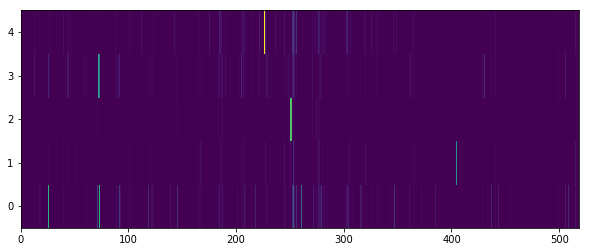

4 [u'fumett', u'comics', u'fumetter', u'nerd', u'epic']
3 [u'cosplay', u'comics', u'cosplayer', u'xmascomics', u'mang']
2 [u'mua', u'makeupartist', u'makeup', u'mbacademy', u'makeuplover']
1 [u'tatto', u'comics', u'ink', u'inked', u'tattooart']
0 [u'cosplay', u'cosplayer', u'comics', u'phot', u'anim']


In [127]:
#Topics by bin
plt.figure(figsize=(10,4))
plt.pcolormesh(A.T)#, cmap=plt.cm.Greys)
plt.xlim(0,A.shape[0])
plt.yticks(np.arange(B.shape[1])+0.5, np.arange(0,B.shape[1]+1))
#plt.savefig('Topic_bybin_normalized.pdf')
plt.show()

for tvi in TermVectorsIndex[::-1]:
    #print TermVectorsIndex.index(tvi), [t for t in tvi[0:3]]
    print TermVectorsIndex.index(tvi), [t[0] for t in tvi[0:5]]

In [352]:
for tvi in TermVectorsIndex[::-1]:
    #print TermVectorsIndex.index(tvi), [t for t in tvi[0:3]]
    print TermVectorsIndex.index(tvi), [t[0] for t in tvi[0:5]]

14 [u'mol', u'night', u'buongiorn', u'immagin', u'murazz']
13 [u'iphones', u'paratissim', u'streetphotography', u'ros', u'light']
12 [u'iphon', u'iphones', u'photography', u'cool', u'th']
11 [u'iphon', u'photography', u'phot', u'night', u'iphones']
10 [u'plac', u'fot', u'phot', u'day', u'drawing']
9 [u'color', u'sky', u'night', u'ciel', u'po']
8 [u'iphones', u'streetphotography', u'paratissim', u'snow', u'iphon']
7 [u'rain', u'buon', u'brav', u'port', u'amic']
6 [u'iphones', u'piazz', u'bell', u'sky', u'street']
5 [u'iphon', u'night', u'animal', u'churc', u'yellow']
4 [u'sush', u'dolc', u'cas', u'ris', u'old']
3 [u'san', u'streetphotography', u'luc', u'light', u'sunris']
2 [u'sky', u'winter', u'ciel', u'cas', u'sunset']
1 [u'sott', u'adess', u'mett', u'far', u'andar']
0 [u'snow', u'nev', u'tre', u'winter', u'rom']


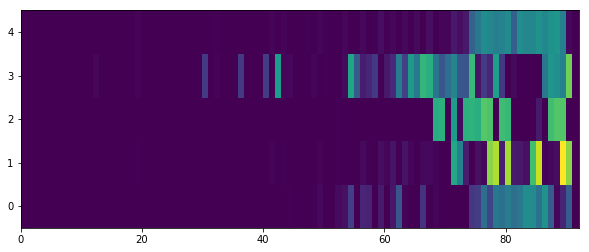

4 [u'fumett', u'comics', u'fumetter', u'nerd', u'epic', u'comicbook']
3 [u'cosplay', u'comics', u'cosplayer', u'xmascomics', u'mang', u'anim']
2 [u'mua', u'makeupartist', u'makeup', u'mbacademy', u'makeuplover', u'makeupaddict']
1 [u'tatto', u'comics', u'ink', u'inked', u'tattooart', u'tattooartist']
0 [u'cosplay', u'cosplayer', u'comics', u'phot', u'anim', u'xmascomics']


In [125]:
#Topics Dynamics
plt.figure(figsize=(10,4))
plt.pcolormesh([c for c in C.T])#, cmap=plt.cm.Greys)
plt.xlim(0,len(C.T[0]))
#plt.savefig('Topic_dynamic.pdf')
plt.yticks(np.arange(n_topics)+0.5, np.arange(0,n_topics));
#plt.xticks(flags[start:stop])
plt.show()
for tvi in TermVectorsIndex[::-1]:
    #print TermVectorsIndex.index(tvi), [t for t in tvi[0:3]]
    print TermVectorsIndex.index(tvi), [t[0] for t in tvi[0:6]]

In [65]:
foldername='Word2vec_TFF'
if foldername not in os.listdir('PKL_files/results/'):
    os.mkdir('PKL_files/results/'+foldername)
foldername='PKL_files/results/'+foldername
pickle.dump(A, open(foldername+'/A.pkl','wb'))
pickle.dump(B, open(foldername+'/B.pkl','wb'))
pickle.dump(C, open(foldername+'/C.pkl','wb'))
pickle.dump(Coordinates, open(foldername+'/Grid.pkl','wb'))
f = open(foldername+'/Tortest_inst_spl.csv', 'w')
for item in feature_names:
    f.write("%s\n" % item.encode('utf-8'))
f.close()

In [148]:
seasons

['white', 'green', 'red', 'orange']

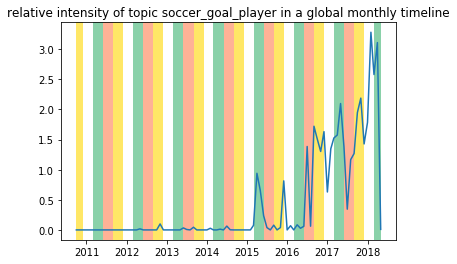

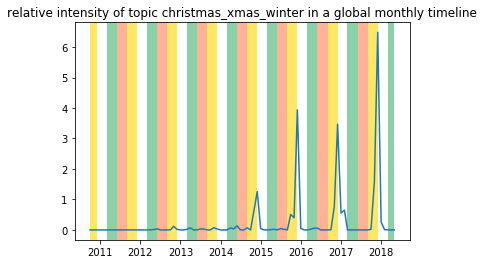

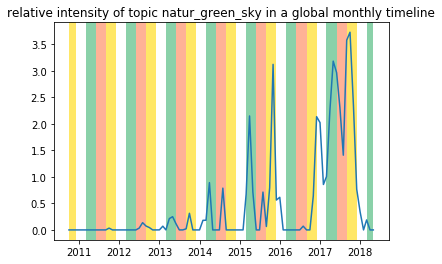

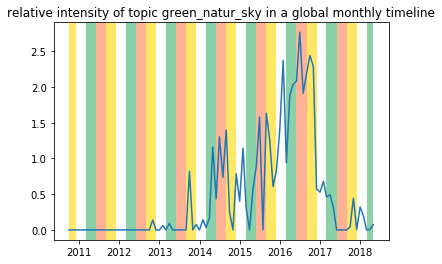

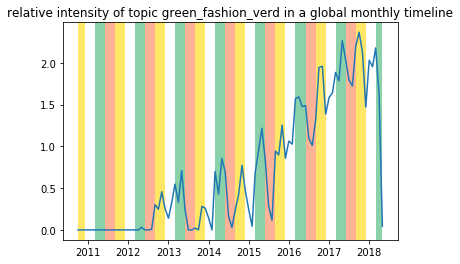

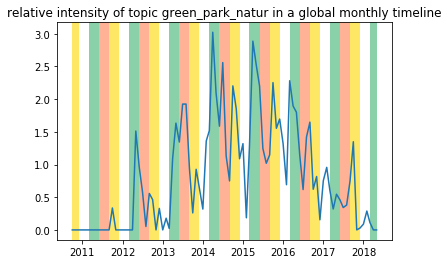

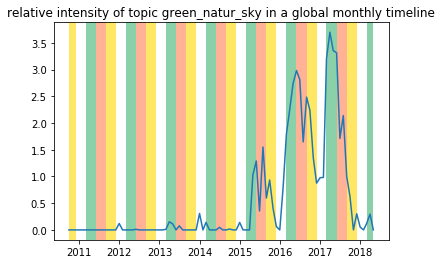

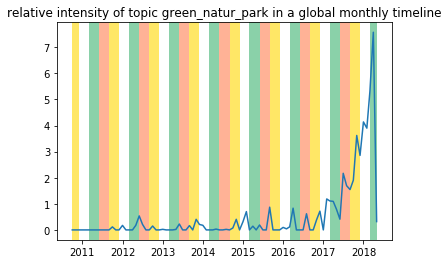

In [156]:
#foldername='Heatmaps_2401_17_noMon'
for index in range(0, len(C.T)):
    row=C.T[index]
    topic=''
    for i in (0,1,2):
        topic+=TermVectorsIndex[index][i][0]+'_'
    topic=topic.strip('_')
    plt.figure()
    plt.plot(flags[start:][0:len(row)], row)
    plt.xticks(flags[start:stop][3::12])
    plt.title('relative intensity of topic '+topic+' in a global monthly timeline')
    for i in xrange(len(flags[start:stop])-1):
        season=seasons[((int(str(flags[start+i].date()).split('-')[1])-3)/3+1)%4]
        plt.axvspan(flags[i],flags[i+1], facecolor=season, alpha=0.6)
        
    if False:
        if foldername not in os.listdir('Figures/Heatmaps/'):
            os.mkdir('Figures/Heatmaps/'+foldername)
        plt.savefig('Figures/Heatmaps/'+foldername+'/plot_topic_'+topic+'.pdf')
    plt.show()

In [ ]:
dfa = pd.DataFrame(A).groupby(voc_serie).sum()
#dfa = dfa[dfa.index!='teachers']

In [ ]:
dfa

In [ ]:
plt.figure(figsize=(10,4))
plt.pcolormesh(C.T)#, cmap=plt.cm.Greys)
plt.xlim(0,C.shape[0])
plt.yticks(np.arange(14)+0.5, np.arange(1,15));

In [ ]:
import scipy.io
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.io import savemat
n_features=1000
n_topics=10

list_reviews_all=df_new['text'].tolist()
counts = vectorizer_s.fit_transform(list_reviews_all)
vectorizer_new = CountVectorizer(max_df=0.95, max_features=n_features,stop_words=all_stopwords_add,vocabulary=vectorizer_s.vocabulary_)
ct=0

# For each month in the dataset, get a snapshot view of the NMF tensor:
for month in range(1,(len(list_years)-1)*12+2,3):
    
    year_start=list_years[0]+ int(month/12)
    month_start=month%12  
    year_end=list_years[0]+ int(month+11-0.5)/12
    month_end=1+(month+11-1)%12
    
    try:
        list_reviews_rest=dataframe_collection[str(year_start) + '-' + str(month_start)]['text'].tolist()
    except KeyError:
        continue
        
    # Learn the vocabulary dictionary and return term-document matrix.
    counts = vectorizer_new.fit_transform(list_reviews_rest)
    
    #Transform a count matrix to a normalized tf-idf representation. 
    #(mainly =Terms with frequencies too hi or lo are removed)
    tfidf = TfidfTransformer().fit_transform(counts)
    
    #Save the data in matlab friendly format
    savemat('Inst500Matr' + str(ct), {'tfidf':tfidf})
    
    
    nmf = decomposition.NMF(n_components=n_topics)
    
    #We are looking for two matrices whose product approximates tfidf.
    
    # Learn the model (parameters etc.). I.e "take a look at what we have". returns nothing.
    W = nmf.fit(tfidf)
    
    # dictionary (factorization matrix)
    H = nmf.components_
    
    # Extracts the data and performs NMF on the tfidf-treated dataset. 
    # Returns the matrix W (the weight matrix), to be multiplied by the matrix H (dictionary) to get target tfidf.
    X2 = nmf.fit_transform(tfidf)
    ct=ct+1
    feature_names = vectorizer_new.get_feature_names()
    print month
    for i,text_topic in enumerate(X2.T):
        
        # i.e -> i, [content of column i of X2]
        # i-th topic named text_topic
        # Why sort them backwards?
        text_top = text_topic.argsort()[:-21:-1]
        word_top = nmf.components_[i].argsort()[:-11:-1]
        
        # For each text topic in the NMF resulting list, print the weight vector and the term vector.
        print [nmf.components_[i,k] for k in nmf.components_[i].argsort()[:-11:-1]]
        print [", ".join([feature_names[i] for i in word_top])]
        
        # print the amount of non-zero components in the weight vector
        l=[text_topic[i] for i in text_top]
        print np.count_nonzero(l)
            

In [ ]:
>>> import numpy as np
>>> X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
>>> from sklearn.decomposition import NMF
>>> model = NMF(n_components=2, init='random', random_state=0)
>>> W = model.fit_transform(X)
>>> H = model.components_

In [ ]:
X

In [ ]:
for i, t in enumerate(X):
    print i,t

In [ ]:
print feature_names

In [ ]:
#save the feature names in a csv file
type(feature_names)
import io

f = io.open('test_inst_Torino.csv', 'w', encoding='utf8')
for item in feature_names:
    print item
    f.write("%s\n" % item)

In [ ]:
#Boundaries of the map
print (df_new['lonbin'].min()-step_lon/2., df_new['latbin'].min()-step_lat/2., df_new['lonbin'].max()+step_lon/2., df_new['latbin'].max()+step_lat/2)

In [ ]:
len(df_new_nodup_cells['n'].unique())
list_rc=df_new_nodup2_cells['n'].tolist()
with open('n_inst500.txt', 'w') as fp:
    fp.write('\n'.join('%s' % x for x in list_rc))

In [ ]:
list_rc

In [ ]:
df_new_nodup2_cells

In [ ]:
df_new_nodup2_cells.head()

In [ ]:
import time
import datetime
list_time=[]
for month in range(1,(len(list_years)-1)*12+2,3):
        year_start=list_years[0]+ int(month/12)
        month_start=month%12  
        year_end=list_years[0]+ int(month+11-0.5)/12
        month_end=1+(month+5-1)%12
             
     
        if month_end in([2,4,6,9,11]):
            day=30
        else:
            day=31
        deb=str(year_start) + '-' + str(month_end) + '-1'
        deb_new=time.mktime(datetime.datetime.strptime(deb, "%Y-%m-%d").timetuple())
        if month==1:
            list_time= np.append(deb_new,list_time)
        else:
            list_time=np.append(list_time,deb_new)


In [ ]:
print list_time

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
vectorizer = CountVectorizer()
corpus = ['This is the first document.',
     'This is the second second document.',
     'And the third one.',
          '',
          '',
     'Is this the first document?']
X_vec = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_vec.toarray()      
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
X_fidf = transformer.fit_transform(X_vec.toarray())
print X_fidf.toarray()

[[0.         0.43746414 0.54222553 0.43746414 0.         0.
  0.36313476 0.         0.43746414]
 [0.         0.26203538 0.         0.26203538 0.         0.86411832
  0.21751303 0.         0.26203538]
 [0.55440642 0.         0.         0.         0.55440642 0.
  0.27910674 0.55440642 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.43746414 0.54222553 0.43746414 0.         0.
  0.36313476 0.         0.43746414]]


In [ ]:

with open('times_inst500.txt', 'w') as fp:
    fp.write('\n'.join('%s' % x for x in list_time))

In [ ]:
Text_tot=[]

if sampling:
    for month in snapshots[start:stop]:
        Text=df_classified[month].tolist()
        #Split the posts: how many of them do we have in each bin?
        list_reviews_rest = [len(a.split(',')) for a in Text]
        #Which bins have info?
        list_indices_info=[Text.index(a) for a in Text if a!='']
        #If we have more posts this month than in the reference month
        if threshold<len(list_reviews_rest):
            #On a bin with info...
            choices=[np.random.choice(list_indices_info) for i in xrange(threshold)]
            #...Pick a tweet among those there.
            choices =[(e,np.random.randint(0,list_reviews_rest[e])) for e in choices]
            This_Month=['' for i in Text]
            for tweet in choices:
                This_Month[tweet[0]]+=Text[tweet[0]].split(',')[tweet[1]]+','
            Text_tot.append(This_Month)
        else:
            Text_tot.append(Text)
            
for month in snapshots[start:stop]:
    ct+=1
    print flags[snapshots.index(month)]
    try:
        if sampling:
            This_Month=Text_tot
        else:
            This_Month=df_classified[month].tolist()